In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom

In [2]:
# higher ed data
juna = pd.read_csv('../../data/junaeb.csv')

#Se eliminan las filas inválidas
juna.dropna(inplace=True)
    
indexNames = juna[juna['vive_madre'] > 1].index
juna.drop(indexNames , inplace=True)
indexNames = juna[juna['n_habitaciones'] < 1].index
juna.drop(indexNames , inplace=True)
indexNames = juna[juna['n_habitaciones'] > 19].index #Hay un valor muy alejado, por lo que afecta el análisis
juna.drop(indexNames , inplace=True)
indexNames = juna[juna['cercania_juegos'] >2].index
juna.drop(indexNames , inplace=True)
indexNames = juna[juna['cercania_servicios'] >2].index
juna.drop(indexNames , inplace=True)

mapa = {2:1,1:0}
juna["cercania_juegos"] = juna["cercania_juegos"].map(mapa)
juna["cercania_servicios"] = juna["cercania_servicios"].map(mapa)

juna.reset_index(drop=True, inplace=True)
juna.head()

#Cambiar el tipo de los stings vacios

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
0,0,1,3.0,4.0,0,0,25.0,1,0,0
1,0,1,5.0,3.0,0,0,23.0,1,13,13
2,1,1,5.0,3.0,0,0,19.0,1,12,17
3,1,1,4.0,2.0,0,0,27.0,1,6,13
4,1,1,5.0,3.0,1,0,20.0,1,13,16


### 1) Limpieza de datos
- Se limpió la variable vive_madre puesto que existían valores mayores a 1
- Se limpió la variable n_habitaciones en los que existian variables menores a 1
- Las variables politomicas cercania_juegos y cerania_servicios, transformadas a variables binarias excluyendo las observaciones donde este dato era "no se sabe"

Análisis de las distribuciones de las variables

Descripcion de vive_padre
Tipo de variable: dummy
Media: 0.6855874425241795
Desviacion estandar: 0.4642814891607616

Descripcion de vive_madre
Tipo de variable: dummy
Media: 0.9738385920405899
Desviacion estandar: 0.1596151267674574

Descripcion de n_personas
Tipo de variable: discreta
Media: 4.394165213255113
Desviacion estandar: 1.34184789603652

Descripcion de n_habitaciones
Tipo de variable: discreta
Media: 2.58442999841446
Desviacion estandar: 0.8734578723689438

Descripcion de cercania_juegos
Tipo de variable: dummy
Media: 0.18170286982717615
Desviacion estandar: 0.38559945140488

Descripcion de cercania_servicios
Tipo de variable: dummy
Media: 0.13191691771048042
Desviacion estandar: 0.33840042040790486

Descripcion de edad_primer_parto
Tipo de variable: discreta
Media: 22.215316315205328
Desviacion estandar: 5.187610718790342

Descripcion de area
Tipo de variable: dummy
Media: 0.9004280957666085
Desviacion estandar: 0.29942835557

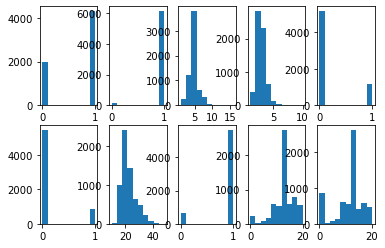

In [3]:
print("Análisis de las distribuciones de las variables\n")
fig, axes = plt.subplots(2,5)
tipos = {"vive_padre":"dummy","vive_madre":"dummy","area":"dummy","cercania_juegos":"dummy",
         "cercania_servicios":"dummy","n_personas":"discreta","n_habitaciones":"discreta",
        "edad_primer_parto":"discreta","educm":"discreta","educp":"discreta"}
axes = np.reshape(axes,10)
for i,col in enumerate(juna.columns):
    print(f"Descripcion de {col}")
    print(f"Tipo de variable: {tipos[col]}")
    print(f"Media: {np.average(juna[col])}")
    print(f"Desviacion estandar: {np.std(juna[col])}\n")
    axes[i].hist(juna[col])

In [4]:
# Modelo de regresión Lineal MCO
columnas = [col for col in juna.columns]
columnas.remove("vive_padre")
columnas.remove("vive_madre")
columnas.remove("cercania_servicios")
columnas.remove("cercania_juegos")

y=juna['vive_padre']
X=juna[columnas]
model = sm.OLS(y,X)
resultado_ols = model.fit()
print(resultado_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:             vive_padre   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              2945.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:26:19   Log-Likelihood:                         -3545.1
No. Observations:                6307   AIC:                                      7102.
Df Residuals:                    6301   BIC:                                      7143.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Notas del modelo de regresión lineal (MCO)
- Notamos que las variables "cercania de juegos" y "cercanía de servicios" no son variables explicativas para predecir la variable "vive_padre" puesto que su rango de valores oscila entre los positivos y negativos, por lo que no hay seguridad de que estos son distintos de cero

- El $R²$ tiene un valor de 0.783 lo que significa que las variables independientes explican un 78.3% del comportamiento de la variable independiente "vive_padre" 

- Debido a que vive_padre es una variable dicotomica, la OLS sirve para determinar valores cuantativos discretos, los valores de esta variable mediante OLS sale de los rangos

In [5]:
# Modelo Probit
columnas = [col for col in juna.columns]
columnas.remove("vive_padre")
columnas.remove("vive_madre")
columnas.remove("cercania_servicios")
columnas.remove("cercania_juegos")
y=juna['vive_padre']
X=juna[columnas]
model = sm.Probit(y,X)
resultado_probit = model.fit()
print(resultado_probit.summary())

Optimization terminated successfully.
         Current function value: 0.542215
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6307
Model:                         Probit   Df Residuals:                     6301
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1291
Time:                        18:26:19   Log-Likelihood:                -3419.7
converged:                       True   LL-Null:                       -3926.6
Covariance Type:            nonrobust   LLR p-value:                6.176e-217
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_personas            0.1317      0.014      9.699      0.000       0.105       0.158
n_habita

In [6]:
# Modelo Logit
model = sm.Logit(y,X)
resultado_logit = model.fit()
print(resultado_logit.summary(alpha = 0.05))

Optimization terminated successfully.
         Current function value: 0.539831
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6307
Model:                          Logit   Df Residuals:                     6301
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1329
Time:                        18:26:19   Log-Likelihood:                -3404.7
converged:                       True   LL-Null:                       -3926.6
Covariance Type:            nonrobust   LLR p-value:                1.912e-223
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
n_personas            0.2366      0.024      9.674      0.000       0.189       0.284
n_habita

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

- Pese a que el modelo OLS obtiene coeficientes con una alta significancia y el modelo explica un 73.9% la probabilidad de que el padre viva en el hogar, el resultado del modelo no está acotado entre [0,1] por lo que carece de propiedades proyectivas.

- De esta forma las distribuciones Probit y Logit son mas apropiadas puesto que permiten precedir la probabilidad de que el padre viva en el hogar. Y entre estos modelos, sabemos que el modelo Logit tiene un Pseudo- $R^2$ mayor, por lo que se ajusta mejor a los datos que Probit. 

- Por otro lado, los valores de salida de log-likelihood de los modelos indican que el modelo Logit es el que mejor se ajusta a los datos que el modelo OLS y Probit, ya que, presente un valor mayor en log-likelihood, afirmando lo anterior.

- Entre las variables usadas en los modelos, "cercania_servicios" y "cercania_juegos" demostraron ser no significativas y ademas tienen coeficientes muy cercanos a cero por lo que se tomó la decisión de excluirlas del modelo. Además se excluyó "vive_madre" pues es una variable que solo mostró significancia en el modelo OLS, por lo que no la consideramos lo suficientemente robusta para predecir la variable "vive_padre".

6. Ejecute un modelo Poisson para explicar el número de personas que hay dentro de un hogar. (n_personas). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

In [7]:
#### PIENSO QUE HAY QUE SACAR "n_personas_sin_pm"
#def n_personas_sin_pm(n,vm,vp):
    #return n -vm -vp

#juna["n_personas_sin_pm"] = juna.apply(lambda x: n_personas_sin_pm(n = x['n_personas'], vm = x['vive_madre'], vp = x['vive_padre']), axis=1)
columnas = [col for col in juna.columns]
columnas.remove("n_personas") #debemos estimar n_personas_sin_pm
#columnas.remove("n_personas_sin_pm")
y=juna['n_personas']
X=juna[columnas]
resultado = sm.GLM(y,X,family=sm.families.Poisson()).fit()

print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6298
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11561.
Date:                Thu, 15 Sep 2022   Deviance:                       2214.1
Time:                        18:26:19   Pearson chi2:                 2.52e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03717
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1219      0

7. Determine sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.

In [8]:
model=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(f"Lambda: {model.mu}")
#Hacemos el test de sobredispersion
aux=((y-model.mu)**2-model.mu)/model.mu
auxr = sm.OLS(aux,model.mu).fit()
alpha = auxr.params[0]
print(auxr.params)
print(f"Alpha: {alpha}")

Lambda: [5.0684192  4.29549815 4.9114804  ... 3.3424157  3.91072775 4.22787141]
x1   -0.139349
dtype: float64
Alpha: -0.13934908752525318


No existe sobredispersión, puesto que el valor de Alpha es negativo, implicando que la varianza es menor a la media, además se puede comparar con que $\frac{\text{Pearson} chi²}{Df} < 1$ justificando la misma afirmación.

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para explicar el número de personas que hay dentro de un hogar. (*n_personas*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

- La distribución Binomial Negativo se utiliza cuando la distribución Poisson presente sobredispersión, es decir, cuando su varianza es superior a su media. Por ende, realizar un modelo Binomial Negativo sería erroneo en este caso.

- Debido a que alpha es negativo, no se puede ajustar una distribucion Binomial Negativa para ser equivalente a la Poisson puesto que valores negativos generan resultados fuera del rango posible para la estimación.

- De todas formas, al generar un modelo con una distrbucion binomial negativa el modelo no se ajusta tan bien como la distribucion Poisson.

In [9]:

columnas = [col for col in juna.columns]
columnas.remove("n_personas")
columnas.remove("edad_primer_parto")
columnas.remove("educm")
columnas.remove("educp")
y=juna['n_personas']
X=juna[columnas]
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6301
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16297.
Date:                Thu, 15 Sep 2022   Deviance:                       422.79
Time:                        18:26:19   Pearson chi2:                     512.
No. Iterations:                     8   Pseudo R-squ. (CS):           0.004607
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1338      0

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

- La utilización del modelo Poisson es el adecuado para determinar el "número de integrantes del hogar" debido a que al realizar un test de sobre dispersión nos da un alpha negativo el cual es respaldado por $\frac{\text{Pearson} chi²}{Df} < 1$, lo que significa que no existe sobre dispersión, ósea que la varianza del modelo es inferior a la media.
- Las variables que no presentan significancia para el modelo son "edad_primer_parto", "educm" y "educp", por lo que no son varibles robustas.

- Los valores de salida de log-likelihood de los modelos indican que el modelo que se ajusta a los datos es el modelo Poisson, ya que, presenta un valor mayor que el modelo Binomial Negativa